# Predicción de Enfermedades Cardíacas con Machine Learning
**Autor:** Juan Felipe García  
**Fecha:** Agosto 2025  
**Dataset:** Kaggle — Heart Disease Dataset  
**Objetivo:** Construir un pipeline completo de **EDA + Modelado + Optimización + Evaluación** para predecir la presencia de enfermedades cardíacas.


Librerías y configuraciones iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv('heart_disease_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,0
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [3]:
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
3064,52,0,1,169,479,0,0,124,0,3.7,2,3,3,0,0,27.8,0
3065,75,0,4,90,372,0,2,141,0,2.1,2,2,3,0,1,37.0,1
3066,68,1,4,166,564,0,1,76,0,4.5,3,1,3,0,0,16.1,0
3067,66,0,3,143,113,1,1,207,0,3.6,1,0,6,0,0,27.7,0
3068,38,1,4,100,507,0,1,187,0,0.9,1,0,7,0,0,16.3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3069 non-null   int64  
 1   sex            3069 non-null   int64  
 2   cp             3069 non-null   int64  
 3   trestbps       3069 non-null   int64  
 4   chol           3069 non-null   int64  
 5   fbs            3069 non-null   int64  
 6   restecg        3069 non-null   int64  
 7   thalach        3069 non-null   int64  
 8   exang          3069 non-null   int64  
 9   oldpeak        3069 non-null   float64
 10  slope          3069 non-null   int64  
 11  ca             3069 non-null   int64  
 12  thal           3069 non-null   int64  
 13  smoking        3069 non-null   int64  
 14  diabetes       3069 non-null   int64  
 15  bmi            3069 non-null   float64
 16  heart_disease  3069 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 407.7 KB


In [5]:
print("=== ANÁLISIS DE DATASET DE ENFERMEDADES CARDÍACAS ===")
print(f"Dataset shape: {df.shape}")
print("\n=== INFORMACIÓN DEL DATASET ===")
print(f"Total de registros: {len(df)}")
print(f"Total de features: {len(df.columns)-1}")
print(f"Variable objetivo: heart_disease")

# Verificar balance de clases
target_counts = df['heart_disease'].value_counts()
print(f"\nDistribución de la variable objetivo:")
print(f"  Clase 0 (Sin enfermedad): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"  Clase 1 (Con enfermedad): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

=== ANÁLISIS DE DATASET DE ENFERMEDADES CARDÍACAS ===
Dataset shape: (3069, 17)

=== INFORMACIÓN DEL DATASET ===
Total de registros: 3069
Total de features: 16
Variable objetivo: heart_disease

Distribución de la variable objetivo:
  Clase 0 (Sin enfermedad): 1830 (59.6%)
  Clase 1 (Con enfermedad): 1239 (40.4%)


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.403715
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.490721
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


#Gráficos

/tmp/ipython-input-2026556832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="heart_disease", palette="Set2")


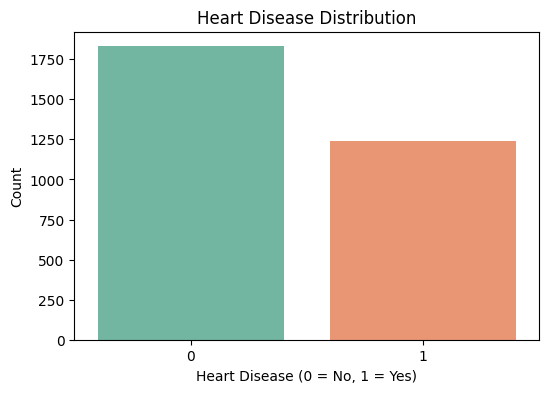

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="heart_disease", palette="Set2")
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

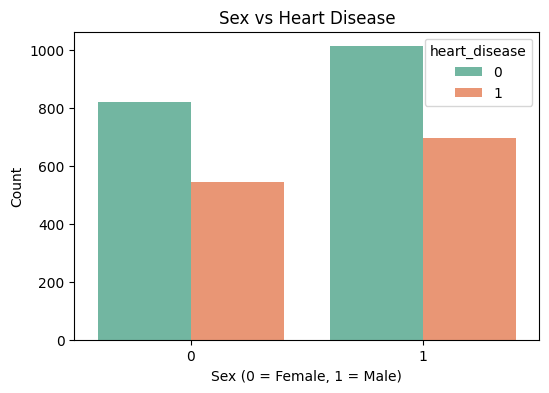

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sex", hue="heart_disease", palette="Set2")
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

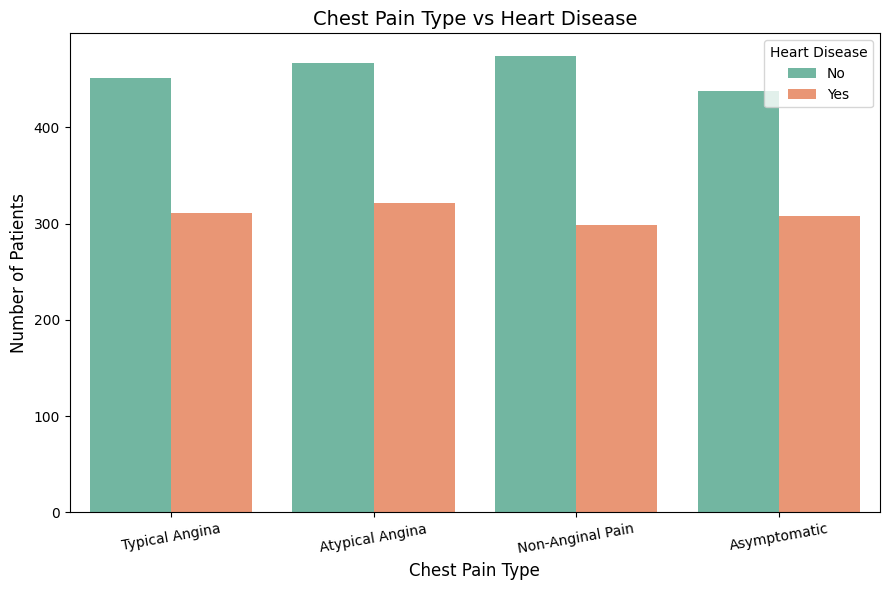

In [9]:
cp_labels = {
    1: "Typical Angina",
    2: "Atypical Angina",
    3: "Non-Anginal Pain",
    4: "Asymptomatic"
}
df["cp_label"] = df["cp"].map(cp_labels)

# Orden correcto de categorías
order = ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"]

# Gráfico mejorado
plt.figure(figsize=(9,6))
sns.countplot(
    data=df,
    x="cp_label",
    hue="heart_disease",
     palette="Set2",
    order=order
)
plt.title("Chest Pain Type vs Heart Disease", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

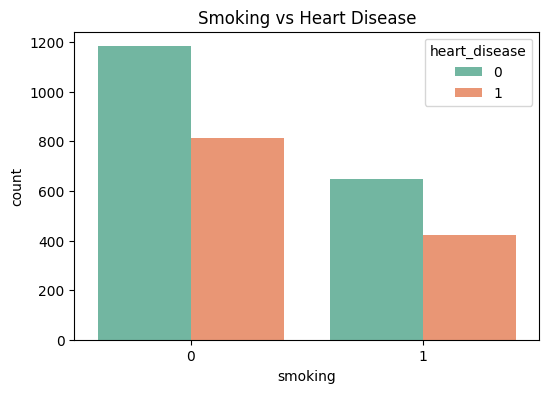

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="smoking", hue="heart_disease", palette="Set2")
plt.title("Smoking vs Heart Disease")
plt.show()

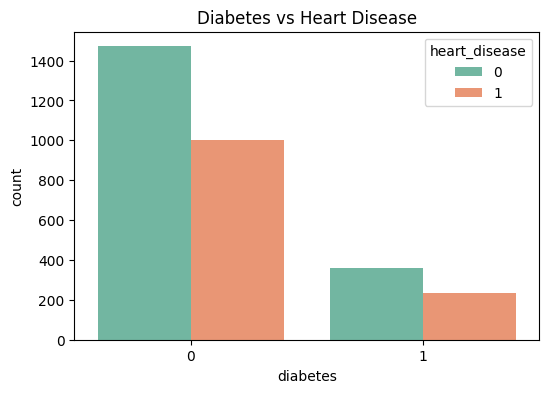

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="diabetes", hue="heart_disease",  palette="Set2")
plt.title("Diabetes vs Heart Disease")
plt.show()

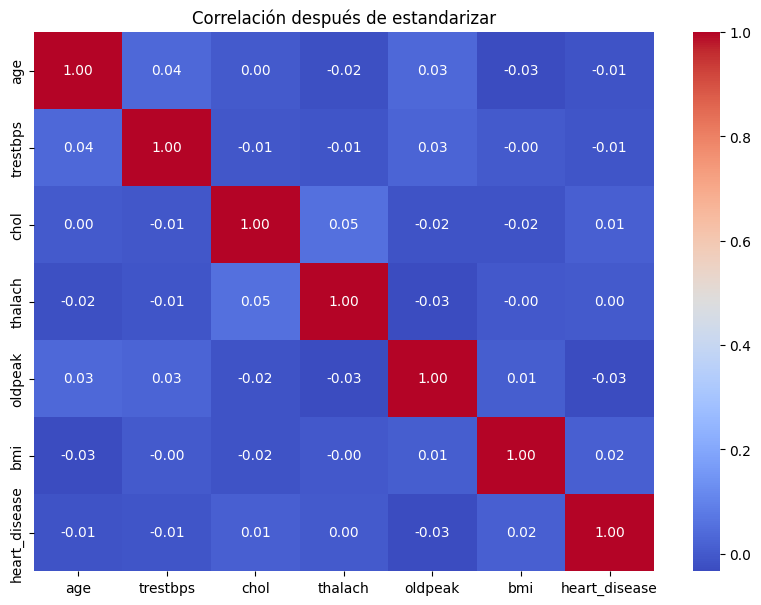

In [12]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age','trestbps','chol','thalach','oldpeak','bmi']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


plt.figure(figsize=(10,7))
sns.heatmap(df_scaled[numeric_cols + ['heart_disease']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación después de estandarizar")
plt.show()


#Predictive modeling


In [13]:

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           roc_auc_score, precision_score, recall_score, f1_score, roc_curve)
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")

In [14]:
#1 Verificar valores faltantes
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(f"\nValores faltantes encontrados:")
    print(missing_values[missing_values > 0])
else:
    print("\n✅ No hay valores faltantes")

# Estadísticas básicas
print(f"\nEstadísticas básicas de variables numéricas:")
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi']
print(df[numeric_features].describe().round(2))


✅ No hay valores faltantes

Estadísticas básicas de variables numéricas:
           age  trestbps     chol  thalach  oldpeak      bmi
count  3069.00   3069.00  3069.00  3069.00  3069.00  3069.00
mean     52.50    145.31   347.22   135.16     3.19    27.50
std      13.71     31.60   146.85    43.35     1.80     7.28
min      29.00     90.00   100.00    60.00     0.00    15.00
25%      41.00    118.00   215.00    98.00     1.60    21.30
50%      53.00    146.00   350.00   135.00     3.20    27.40
75%      64.00    172.00   475.00   172.00     4.70    33.90
max      76.00    200.00   600.00   210.00     6.20    40.00


Preparación de Datos


*   Selección de features
*   Escalado
*   Encoding de variables categóricas








In [15]:

feature_columns = [c for c in df.columns if c not in ['heart_disease', 'cp_label']]
X = df[feature_columns].copy()
y = df['heart_disease'].copy()

print(f"Features utilizadas: {len(X.columns)}")
print(f"Features: {list(X.columns)}")

#  estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape[0]} registros")
print(f"Test set: {X_test.shape[0]} registros")

# Escalado
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

robust_scaler = RobustScaler()
X_train_robust = pd.DataFrame(robust_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_robust  = pd.DataFrame(robust_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


Features utilizadas: 16
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi']
Training set: 2455 registros
Test set: 614 registros


Definición de modelos y comparación para seleccionar los mejores en rendiemeinto

In [16]:

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Extra Trees': ExtraTreesClassifier(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM (RBF)': SVC(random_state=42, probability=True),
    'SVM (Linear)': SVC(random_state=42, kernel='linear', probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME')
}

print(f"Total de modelos a evaluar: {len(models)}")

#FUNCIÓN PARA COMPARAR MODELOS
def compare_models_comprehensive(models, X_train, X_train_scaled, X_train_robust, y_train, cv=5):
    """Comparación exhaustiva de modelos con diferentes tipos de escalado"""
    results = {}
    cv_strategy = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    print("=== COMPARACIÓN EXHAUSTIVA DE MODELOS ===")
    print("-" * 80)

    for name, model in models.items():
        print(f"Evaluando {name}...")

        # Seleccionar tipo de datos según el modelo
        if name in ['Logistic Regression', 'SVM (RBF)', 'SVM (Linear)', 'K-Nearest Neighbors']:
            X_data = X_train_scaled  # Modelos sensibles a escala
            scaler_type = 'Standard'
        elif name in ['Naive Bayes']:
            X_data = X_train_robust   # Menos sensible a outliers
            scaler_type = 'Robust'
        else:
            X_data = X_train         # Tree-based models no necesitan escalado
            scaler_type = 'None'

        try:
            # Validación cruzada con múltiples métricas
            accuracy_scores = cross_val_score(model, X_data, y_train, cv=cv_strategy, scoring='accuracy')
            precision_scores = cross_val_score(model, X_data, y_train, cv=cv_strategy, scoring='precision')
            recall_scores = cross_val_score(model, X_data, y_train, cv=cv_strategy, scoring='recall')
            f1_scores = cross_val_score(model, X_data, y_train, cv=cv_strategy, scoring='f1')
            auc_scores = cross_val_score(model, X_data, y_train, cv=cv_strategy, scoring='roc_auc')

            results[name] = {
                'Accuracy': accuracy_scores.mean(),
                'Accuracy_Std': accuracy_scores.std(),
                'Precision': precision_scores.mean(),
                'Precision_Std': precision_scores.std(),
                'Recall': recall_scores.mean(),
                'Recall_Std': recall_scores.std(),
                'F1': f1_scores.mean(),
                'F1_Std': f1_scores.std(),
                'AUC': auc_scores.mean(),
                'AUC_Std': auc_scores.std(),
                'Scaler': scaler_type
            }

            print(f"  ✅ Accuracy: {accuracy_scores.mean():.4f} (±{accuracy_scores.std():.4f})")
            print(f"     F1-Score: {f1_scores.mean():.4f}, AUC: {auc_scores.mean():.4f}")

        except Exception as e:
            print(f"  ❌ Error: {str(e)}")
            continue

    # Crear DataFrame con resultados ordenado por F1-Score
    results_df = pd.DataFrame.from_dict(results, orient='index')
    results_df = results_df.sort_values('F1', ascending=False)

    return results, results_df

# Ejecutar comparación
print("Iniciando comparación de modelos")
model_results, results_df = compare_models_comprehensive(
    models, X_train, X_train_scaled, X_train_robust, y_train, cv=5
)


Total de modelos a evaluar: 10
Iniciando comparación de modelos
=== COMPARACIÓN EXHAUSTIVA DE MODELOS ===
--------------------------------------------------------------------------------
Evaluando Logistic Regression...
  ✅ Accuracy: 0.5955 (±0.0057)
     F1-Score: 0.0252, AUC: 0.4991
Evaluando Random Forest...
  ✅ Accuracy: 0.5739 (±0.0144)
     F1-Score: 0.2509, AUC: 0.5178
Evaluando Gradient Boosting...
  ✅ Accuracy: 0.5695 (±0.0124)
     F1-Score: 0.2293, AUC: 0.5329
Evaluando Extra Trees...
  ✅ Accuracy: 0.5674 (±0.0273)
     F1-Score: 0.2469, AUC: 0.5111
Evaluando Decision Tree...
  ✅ Accuracy: 0.5181 (±0.0196)
     F1-Score: 0.4245, AUC: 0.5055
Evaluando SVM (RBF)...
  ✅ Accuracy: 0.5772 (±0.0111)
     F1-Score: 0.1065, AUC: 0.5167
Evaluando SVM (Linear)...
  ✅ Accuracy: 0.5963 (±0.0008)
     F1-Score: 0.0000, AUC: 0.5006
Evaluando K-Nearest Neighbors...
  ✅ Accuracy: 0.5328 (±0.0143)
     F1-Score: 0.3428, AUC: 0.5140
Evaluando Naive Bayes...
  ✅ Accuracy: 0.5817 (±0.0193)
    

In [17]:
print("\n" + "="*80)
print("RANKING DE MODELOS (Ordenado por F1-Score)")
print("="*80)

# Formatear resultados para mejor visualización
display_df = results_df[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'Scaler']].round(4)
print(display_df.to_string())



RANKING DE MODELOS (Ordenado por F1-Score)
                     Accuracy  Precision  Recall      F1     AUC    Scaler
Decision Tree          0.5181     0.4103  0.4400  0.4245  0.5055      None
K-Nearest Neighbors    0.5328     0.3962  0.3027  0.3428  0.5140  Standard
Random Forest          0.5739     0.4292  0.1776  0.2509  0.5178      None
Extra Trees            0.5674     0.4203  0.1756  0.2469  0.5111      None
Gradient Boosting      0.5695     0.4166  0.1604  0.2293  0.5329      None
Naive Bayes            0.5817     0.4400  0.0767  0.1266  0.4987    Robust
SVM (RBF)              0.5772     0.3686  0.0626  0.1065  0.5167  Standard
AdaBoost               0.5890     0.3651  0.0292  0.0532  0.5117      None
Logistic Regression    0.5955     0.3876  0.0131  0.0252  0.4991  Standard
SVM (Linear)           0.5963     0.0000  0.0000  0.0000  0.5006  Standard


# OPTIMIZACIÓN DE HIPERPARÁMETROS PARA LOS TOP 3 MODELOS


In [18]:
top_models = results_df.head(3).index.tolist()
print(f"\n=== OPTIMIZANDO HIPERPARÁMETROS PARA TOP 3 MODELOS ===")
print(f"Modelos seleccionados: {top_models}")

# Definir grids de hiperparámetros específicos para enfermedades cardíacas
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Extra Trees': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 2000]
    },
    'SVM (RBF)': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'kernel': ['rbf']
    },
    'SVM (Linear)': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

def optimize_model(model_name, base_model, X_train, X_train_scaled, X_train_robust, y_train, param_grid):
    """Optimizar hiperparámetros usando RandomizedSearchCV"""
    print(f"\nOptimizando {model_name}...")

    # Seleccionar datos apropiados
    if model_name in ['Logistic Regression', 'SVM (RBF)', 'SVM (Linear)', 'K-Nearest Neighbors']:
        X_data = X_train_scaled
    elif model_name in ['Naive Bayes']:
        X_data = X_train_robust
    else:
        X_data = X_train

    # Usar RandomizedSearchCV para búsqueda más eficiente
    random_search = RandomizedSearchCV(
        base_model,
        param_grid,
        n_iter=50,  # Número de combinaciones a probar
        cv=5,
        scoring='f1',  # Optimizar por F1-score
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    random_search.fit(X_data, y_train)

    print(f"  Mejores parámetros: {random_search.best_params_}")
    print(f"  Mejor F1-Score CV: {random_search.best_score_:.4f}")

    return random_search.best_estimator_, random_search.best_params_, random_search.best_score_

# Optimizar los top 3 modelos
optimized_models = {}
for model_name in top_models:
    if model_name in param_grids:
        try:
            best_model, best_params, best_score = optimize_model(
                model_name,
                models[model_name],
                X_train, X_train_scaled, X_train_robust,
                y_train,
                param_grids[model_name]
            )
            optimized_models[model_name] = {
                'model': best_model,
                'params': best_params,
                'cv_score': best_score
            }
        except Exception as e:
            print(f"  ❌ Error optimizando {model_name}: {str(e)}")
            # Usar modelo base si la optimización falla
            optimized_models[model_name] = {
                'model': models[model_name],
                'params': {},
                'cv_score': model_results[model_name]['F1']
            }
    else:
        print(f"  ⚠️  No hay grid definido para {model_name}, usando modelo base")
        optimized_models[model_name] = {
            'model': models[model_name],
            'params': {},
            'cv_score': model_results[model_name]['F1']
        }



=== OPTIMIZANDO HIPERPARÁMETROS PARA TOP 3 MODELOS ===
Modelos seleccionados: ['Decision Tree', 'K-Nearest Neighbors', 'Random Forest']
  ⚠️  No hay grid definido para Decision Tree, usando modelo base

Optimizando K-Nearest Neighbors...
  Mejores parámetros: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}
  Mejor F1-Score CV: 0.3843

Optimizando Random Forest...
  Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}
  Mejor F1-Score CV: 0.2869


#EVALUACIÓN FINAL EN CONJUNTO DE TEST


In [19]:
print(f"\n" + "="*80)
print("EVALUACIÓN FINAL EN CONJUNTO DE TEST")
print("="*80)

final_results = {}

for model_name, model_info in optimized_models.items():
    print(f"\nEvaluando {model_name}...")

    # Seleccionar datos apropiados para test
    if model_name in ['Logistic Regression', 'SVM (RBF)', 'SVM (Linear)', 'K-Nearest Neighbors']:
        X_train_final = X_train_scaled
        X_test_final = X_test_scaled
    elif model_name in ['Naive Bayes']:
        X_train_final = X_train_robust
        X_test_final = X_test_robust
    else:
        X_train_final = X_train
        X_test_final = X_test

    # Entrenar y evaluar
    model = model_info['model']
    model.fit(X_train_final, y_train)

    y_pred = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    final_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'AUC': auc,
        'CV_F1': model_info['cv_score']
    }

    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Test F1-Score: {f1:.4f}")
    print(f"  Test AUC: {auc:.4f}")


EVALUACIÓN FINAL EN CONJUNTO DE TEST

Evaluando Decision Tree...
  Test Accuracy: 0.5244
  Test F1-Score: 0.4041
  Test AUC: 0.5042

Evaluando K-Nearest Neighbors...
  Test Accuracy: 0.5049
  Test F1-Score: 0.3333
  Test AUC: 0.4740

Evaluando Random Forest...
  Test Accuracy: 0.5358
  Test F1-Score: 0.2400
  Test AUC: 0.4664


# CREAR MODELO ENSEMBLE (VOTING)

In [20]:
print(f"\n=== CREANDO MODELO ENSEMBLE ===")

# Seleccionar los mejores modelos para ensemble
ensemble_models = []
for model_name, model_info in optimized_models.items():
    if model_name in ['Logistic Regression', 'SVM (RBF)', 'SVM (Linear)', 'K-Nearest Neighbors']:
        X_train_final = X_train_scaled
    elif model_name in ['Naive Bayes']:
        X_train_final = X_train_robust
    else:
        X_train_final = X_train

    # Entrenar modelo para ensemble
    model = model_info['model']
    model.fit(X_train_final, y_train)
    ensemble_models.append((model_name.replace(' ', '_').replace('(', '').replace(')', ''), model))

# Crear Voting Classifier
voting_clf = VotingClassifier(
    estimators=ensemble_models,
    voting='soft'  # Usar probabilidades
)

# Entrenar ensemble (necesitamos usar un conjunto de datos común)
voting_clf.fit(X_train_scaled, y_train)  # Usar scaled para consistencia
y_pred_ensemble = voting_clf.predict(X_test_scaled)
y_pred_proba_ensemble = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluar ensemble
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
ensemble_auc = roc_auc_score(y_test, y_pred_proba_ensemble)

final_results['ENSEMBLE'] = {
    'Accuracy': ensemble_accuracy,
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall': recall_score(y_test, y_pred_ensemble),
    'F1': ensemble_f1,
    'AUC': ensemble_auc,
    'CV_F1': 'N/A'
}

print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")
print(f"Ensemble F1-Score: {ensemble_f1:.4f}")
print(f"Ensemble AUC: {ensemble_auc:.4f}")


=== CREANDO MODELO ENSEMBLE ===
Ensemble Accuracy: 0.5293
Ensemble F1-Score: 0.3563
Ensemble AUC: 0.4861


# RESUMEN FINAL

In [21]:
print(f"\n" + "="*80)
print("RESUMEN FINAL - MEJORES MODELOS")
print("="*80)

# Crear DataFrame final
final_df = pd.DataFrame.from_dict(final_results, orient='index')
final_df = final_df.sort_values('F1', ascending=False)

print("\nRanking por F1-Score en Test:")
print(final_df[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].round(4).to_string())

# Encontrar el mejor modelo
best_final_model = final_df.index[0]
best_f1_score = final_df.loc[best_final_model, 'F1']

print(f"\n🏆 MEJOR MODELO: {best_final_model}")
print(f"🎯 F1-Score: {best_f1_score:.4f}")
print(f"🎯 AUC: {final_df.loc[best_final_model, 'AUC']:.4f}")
print(f"🎯 Accuracy: {final_df.loc[best_final_model, 'Accuracy']:.4f}")



RESUMEN FINAL - MEJORES MODELOS

Ranking por F1-Score en Test:
                     Accuracy  Precision  Recall      F1     AUC
Decision Tree          0.5244     0.4091  0.3992  0.4041  0.5042
ENSEMBLE               0.5293     0.3980  0.3226  0.3563  0.4861
K-Nearest Neighbors    0.5049     0.3654  0.3065  0.3333  0.4740
Random Forest          0.5358     0.3543  0.1815  0.2400  0.4664

🏆 MEJOR MODELO: Decision Tree
🎯 F1-Score: 0.4041
🎯 AUC: 0.5042
🎯 Accuracy: 0.5244


# VISUALIZACIONES FINALES

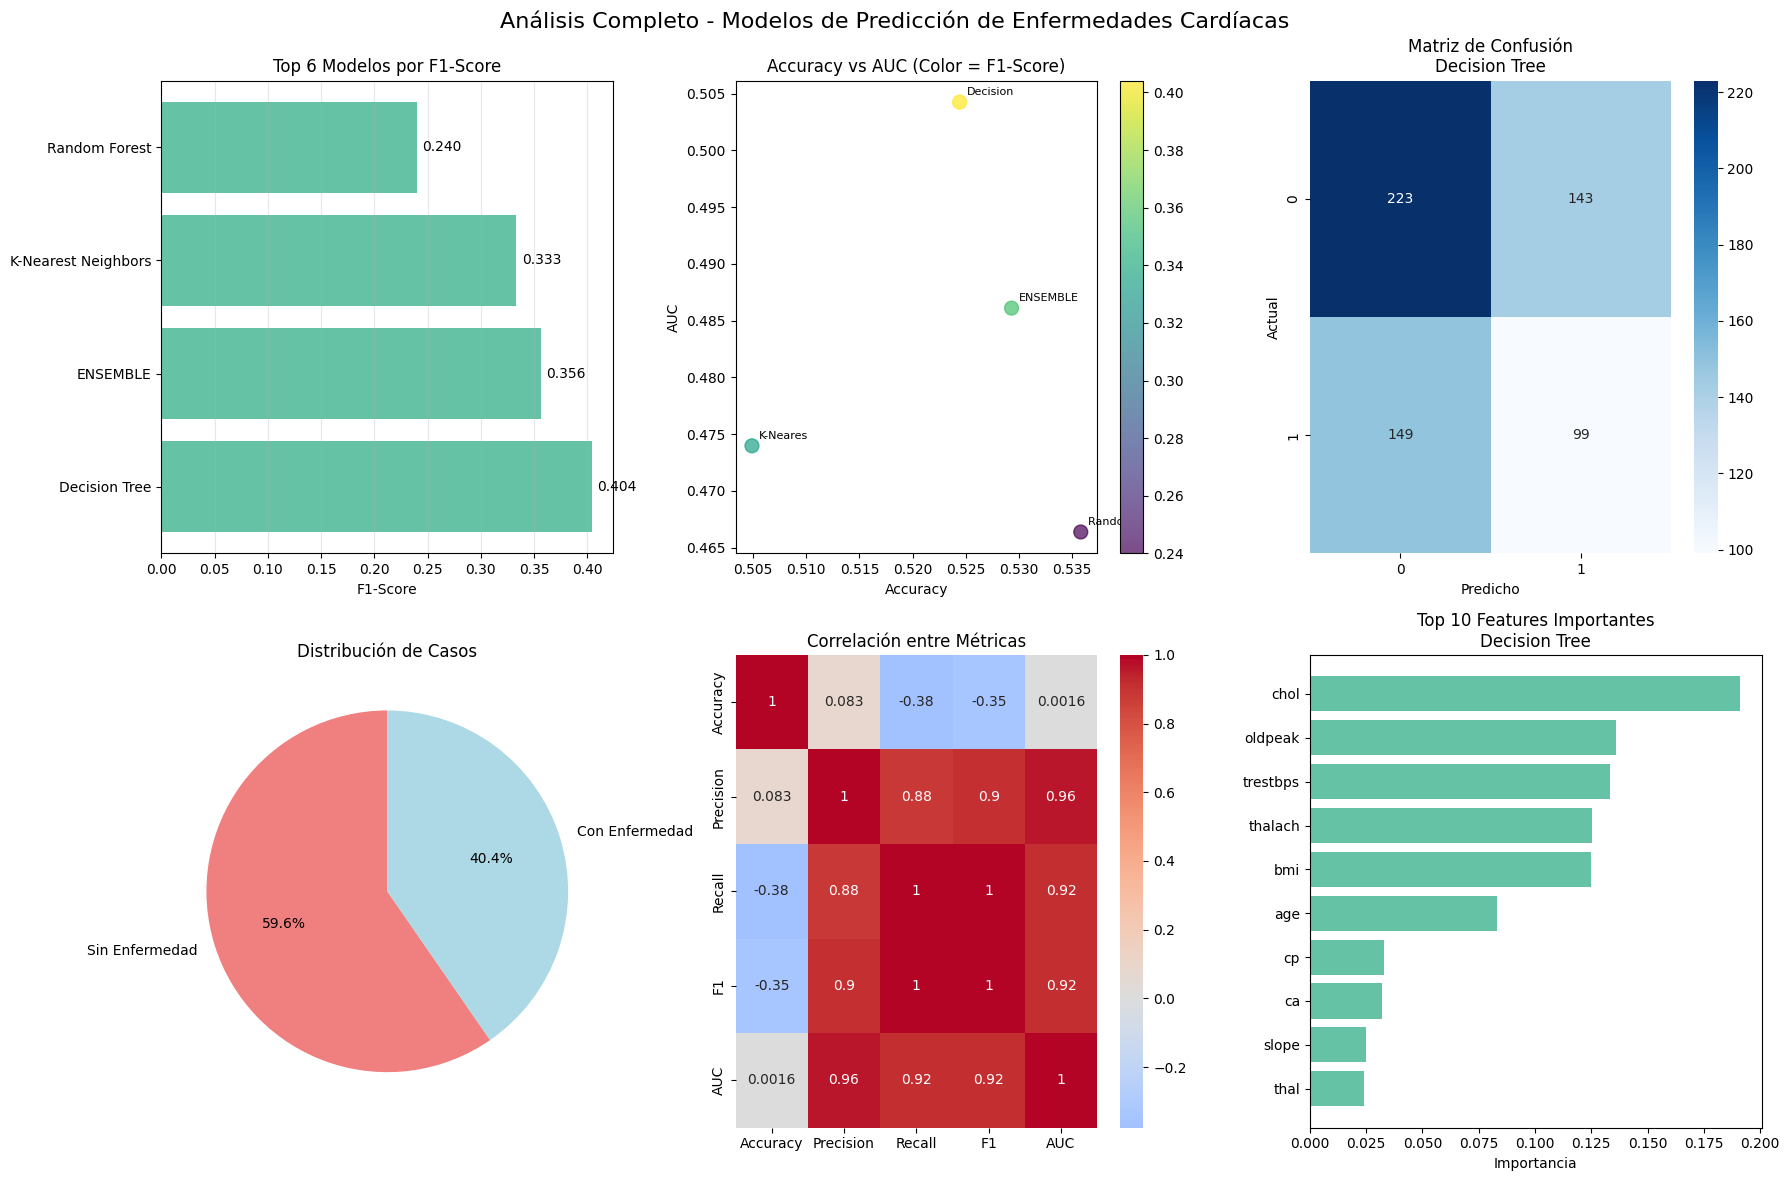

In [22]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Completo - Modelos de Predicción de Enfermedades Cardíacas', fontsize=16)

# 1. Comparación de F1-Scores
ax1 = axes[0, 0]
top_models_plot = final_df.head(6)
bars = ax1.barh(range(len(top_models_plot)), top_models_plot['F1'])
ax1.set_yticks(range(len(top_models_plot)))
ax1.set_yticklabels(top_models_plot.index)
ax1.set_xlabel('F1-Score')
ax1.set_title('Top 6 Modelos por F1-Score')
ax1.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(top_models_plot['F1']):
    ax1.text(v + 0.005, i, f'{v:.3f}', va='center')

# 2. Comparación Accuracy vs AUC
ax2 = axes[0, 1]
scatter = ax2.scatter(final_df['Accuracy'], final_df['AUC'],
                     s=100, c=final_df['F1'], cmap='viridis', alpha=0.7)
ax2.set_xlabel('Accuracy')
ax2.set_ylabel('AUC')
ax2.set_title('Accuracy vs AUC (Color = F1-Score)')
plt.colorbar(scatter, ax=ax2)

# Anotar puntos
for idx, row in final_df.iterrows():
    ax2.annotate(idx[:8], (row['Accuracy'], row['AUC']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# 3. Matriz de confusión del mejor modelo
ax3 = axes[0, 2]
if best_final_model == 'ENSEMBLE':
    cm = confusion_matrix(y_test, y_pred_ensemble)
else:
    # Reconstruir predicciones del mejor modelo
    best_model_name = best_final_model
    if best_model_name in ['Logistic Regression', 'SVM (RBF)', 'SVM (Linear)', 'K-Nearest Neighbors']:
        X_test_best = X_test_scaled
    else:
        X_test_best = X_test

    best_model_obj = optimized_models[best_model_name]['model']
    y_pred_best = best_model_obj.predict(X_test_best)
    cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_title(f'Matriz de Confusión\n{best_final_model}')
ax3.set_ylabel('Actual')
ax3.set_xlabel('Predicho')

# 4. Distribución de la variable objetivo
ax4 = axes[1, 0]
target_counts = y.value_counts()
colors = ['lightcoral', 'lightblue']
wedges, texts, autotexts = ax4.pie(target_counts.values, labels=['Sin Enfermedad', 'Con Enfermedad'],
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax4.set_title('Distribución de Casos')

# 5. Correlación de métricas
ax5 = axes[1, 1]
metrics_corr = final_df[['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']].corr()
sns.heatmap(metrics_corr, annot=True, cmap='coolwarm', center=0, ax=ax5)
ax5.set_title('Correlación entre Métricas')

# 6. Importancia de features (si disponible)
ax6 = axes[1, 2]
if best_final_model != 'ENSEMBLE' and hasattr(optimized_models[best_final_model]['model'], 'feature_importances_'):
    importance = optimized_models[best_final_model]['model'].feature_importances_
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': importance
    }).sort_values('importance', ascending=True).tail(10)

    ax6.barh(range(len(feature_importance)), feature_importance['importance'])
    ax6.set_yticks(range(len(feature_importance)))
    ax6.set_yticklabels(feature_importance['feature'])
    ax6.set_xlabel('Importancia')
    ax6.set_title(f'Top 10 Features Importantes\n{best_final_model}')
else:
    ax6.text(0.5, 0.5, 'Importancia de Features\nno disponible',
             ha='center', va='center', transform=ax6.transAxes, fontsize=12)
    ax6.set_title('Importancia de Features')

plt.tight_layout()
plt.show()

In [23]:

print(f"\n" + "="*80)
print("REPORTE FINAL DETALLADO")
print("="*80)

print(f"📊 DATASET ANALIZADO:")
print(f"   • Registros totales: {len(df):,}")
print(f"   • Features: {len(feature_columns)}")
print(f"   • Distribución: {target_counts[0]} sin enfermedad, {target_counts[1]} con enfermedad")

print(f"\n🔬 MODELOS EVALUADOS:")
print(f"   • Total modelos base: {len(models)}")
print(f"   • Modelos optimizados: {len(optimized_models)}")
print(f"   • Validación cruzada: 5-fold stratified")

print(f"\n🏆 MEJORES RESULTADOS:")
for i, (model_name, metrics) in enumerate(final_df.head(3).iterrows(), 1):
    print(f"   {i}. {model_name}")
    print(f"      • F1-Score: {metrics['F1']:.4f}")
    print(f"      • AUC: {metrics['AUC']:.4f}")
    print(f"      • Accuracy: {metrics['Accuracy']:.4f}")

print(f"\n✅ PROCESO COMPLETADO EXITOSAMENTE")
print(f"✅ Mejor modelo identificado: {best_final_model}")
print(f"✅ Score final (F1): {best_f1_score:.4f}")

# Guardar resultados (opcional)
# final_df.to_csv('heart_disease_model_results.csv', index=True)
# print(f"✅ Resultados guardados en 'heart_disease_model_results.csv'")


REPORTE FINAL DETALLADO
📊 DATASET ANALIZADO:
   • Registros totales: 3,069
   • Features: 16
   • Distribución: 1830 sin enfermedad, 1239 con enfermedad

🔬 MODELOS EVALUADOS:
   • Total modelos base: 10
   • Modelos optimizados: 3
   • Validación cruzada: 5-fold stratified

🏆 MEJORES RESULTADOS:
   1. Decision Tree
      • F1-Score: 0.4041
      • AUC: 0.5042
      • Accuracy: 0.5244
   2. ENSEMBLE
      • F1-Score: 0.3563
      • AUC: 0.4861
      • Accuracy: 0.5293
   3. K-Nearest Neighbors
      • F1-Score: 0.3333
      • AUC: 0.4740
      • Accuracy: 0.5049

✅ PROCESO COMPLETADO EXITOSAMENTE
✅ Mejor modelo identificado: Decision Tree
✅ Score final (F1): 0.4041


# Cerrar el modelo en un Pipeline y guardarlo


In [24]:
import json
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# 1) Elige el “campeón”

champion_name = best_final_model  # por ejemplo 'ENSEMBLE' o 'Gradient Boosting'
print("Campeón:", champion_name)

if champion_name == 'ENSEMBLE':
    champion_model = voting_clf
    needs_scaling = True
else:
    champion_model = optimized_models[champion_name]['model']
    needs_scaling = champion_name in ['Logistic Regression','SVM (RBF)','SVM (Linear)','K-Nearest Neighbors']

# 2) Define el orden/selección de features (SIN la target ni columnas de apoyo)
feature_columns = [c for c in df.columns if c not in ['heart_disease','cp_label']]
X_all = df[feature_columns].copy()

# 3) Arma un transformador por columnas (numéricas todas en este dataset)
#    Si tu campeón necesita escala -> StandardScaler; si no -> 'passthrough'
transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler() if needs_scaling else 'passthrough', feature_columns)
    ],
    remainder="drop"
)

# 4) Pipeline = (preprocesado) -> (modelo)
pipe = Pipeline(steps=[
    ("prep", transformer),
    ("model", champion_model)
])

# 5) Entrenar el pipeline en TODO el dataset (buena práctica tras elegir campeón)
pipe.fit(X_all, df['heart_disease'])

# 6) Guardar artefactos
joblib.dump(pipe, "/content/heart_disease_pipeline.pkl")

# Extra: guarda el “esquema” de features y mapeos para UI
schema = {
    "feature_order": feature_columns,
    "categorical_maps": {
        "cp": {0:"Typical Angina", 1:"Atypical Angina", 2:"Non-Anginal Pain", 3:"Asymptomatic"},
        "sex": {0:"Female", 1:"Male"},
        "fbs": {0:"≤120 mg/dl", 1:">120 mg/dl"},
        "restecg": {0:"Normal", 1:"ST-T abnormality", 2:"LV hypertrophy"},
        "exang": {0:"No", 1:"Yes"},
        "slope": {0:"Upsloping", 1:"Flat", 2:"Downsloping"},
        "thal": {0:"Normal", 1:"Fixed defect", 2:"Reversible defect"},
        "smoking": {0:"No", 1:"Yes"},
        "diabetes": {0:"No", 1:"Yes"}
    }
}
with open("/content/feature_schema.json", "w") as f:
    json.dump(schema, f, indent=2)

print("✅ Guardados: /content/heart_disease_pipeline.pkl y /content/feature_schema.json")


Campeón: Decision Tree
✅ Guardados: /content/heart_disease_pipeline.pkl y /content/feature_schema.json
